<a href="https://colab.research.google.com/github/costadomar/Portif-lio_projeto/blob/main/Cred_Card_Clustering_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A base de dados que irá ser trabalhada aqui será de perfis de clientes de cartão de crédito. Com isso, iremos divir os clientes que possuem perfis semelhantes para sujestão de ofertas de acordo com o perfil.

Para entedimento desse perfil, irá se fazer uma clusterização na base de dados
 método [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans) e dizer qual é o perfil médio de dos clientes de cada cluster. Além disso, logo depois da da clsuterização irá fazr uma análise de regressão com o método [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.get_params).

Você pode ler informações sobre esse dataset nesse link do [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata).


Dicionário das variáveis do dataset:

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

NEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

#1. IMPORTANDO AS BIBLIOTECAS

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Bibliotecas para a clusterização
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

##Bibliotecas para regressão
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

#2. CARREGANDO A BASE DE DADOS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/[ALUNOS] Clustering - materiais exercícios-/Clustering - materiais exercícios/Dataset/CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.drop(['CUST_ID'], axis = 1, inplace = True) # Removendo essa coluna devido ser o número do usuário e não irá ser importante para modelagem.

#3. Tratamento, estatística descritivas e visualização dos dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
#verificando dados ausentes
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

para esses dados ausentes nas colunas, o preenchimento vai ser com o valor minimo das colunas.

In [8]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].min(), inplace = True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].min(), inplace = True)

In [9]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.95])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.952864,1733.143852,833.984123,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.915681,2895.063757,2335.989679,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
95%,5909.111808,1.000000,3998.619500,2671.094000,1750.087500,4647.169122,1.000000,1.000000,1.000000,0.583333,15.000000,57.000000,12000.000000,6082.090595,2719.566935,1.000000,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


##3.1 Histograma dos dados

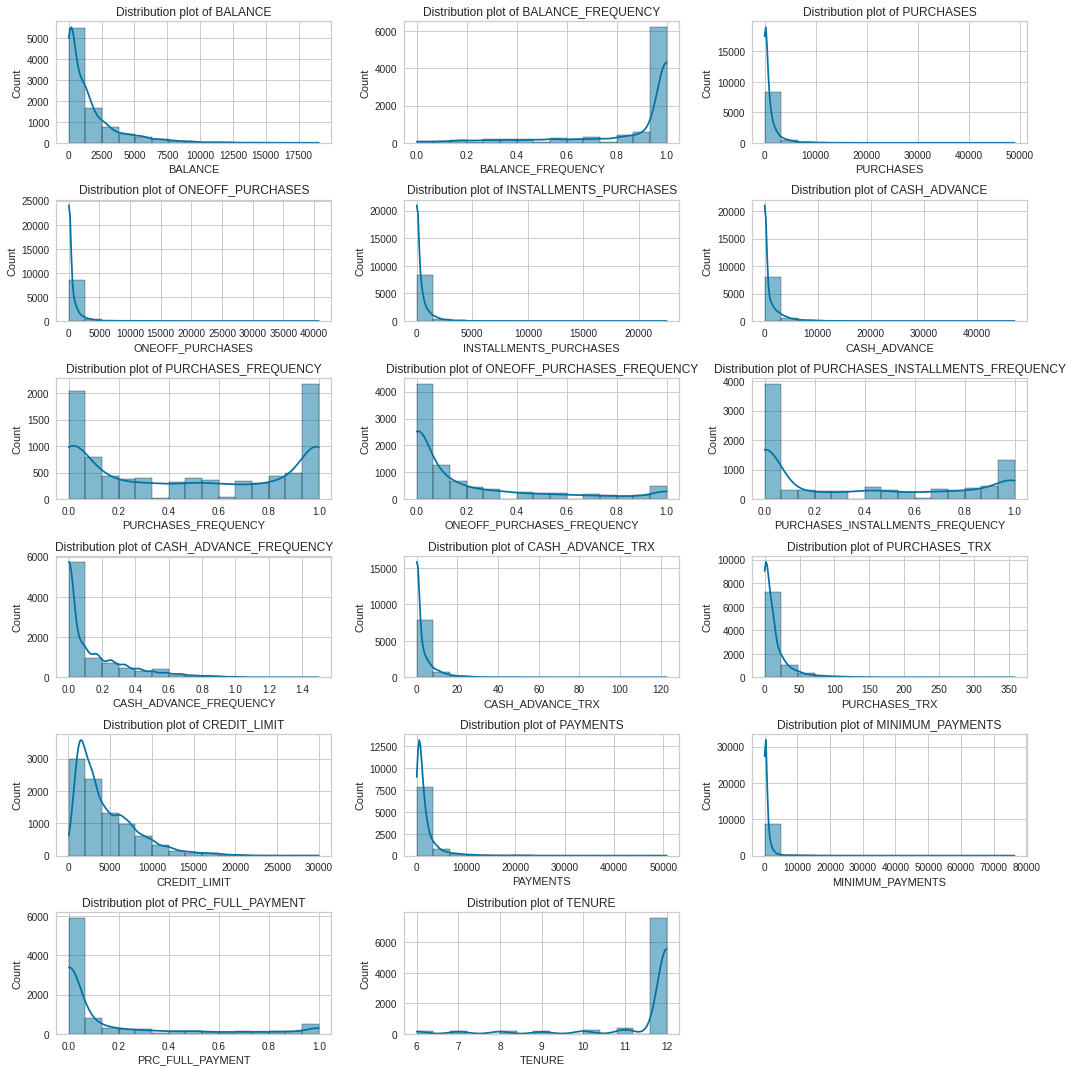

In [10]:
plt.figure(figsize=(15, 15))
for i in range(len(df.columns)):
  plt.subplot(6, 3, i+1)
  sns.histplot(x = df[df.columns[i]],bins=15, data = df, kde=True)
  plt.title('Distribution plot of {}'.format(df.columns[i]))
  plt.tight_layout()

##3.2 Matriz de Correlaçao

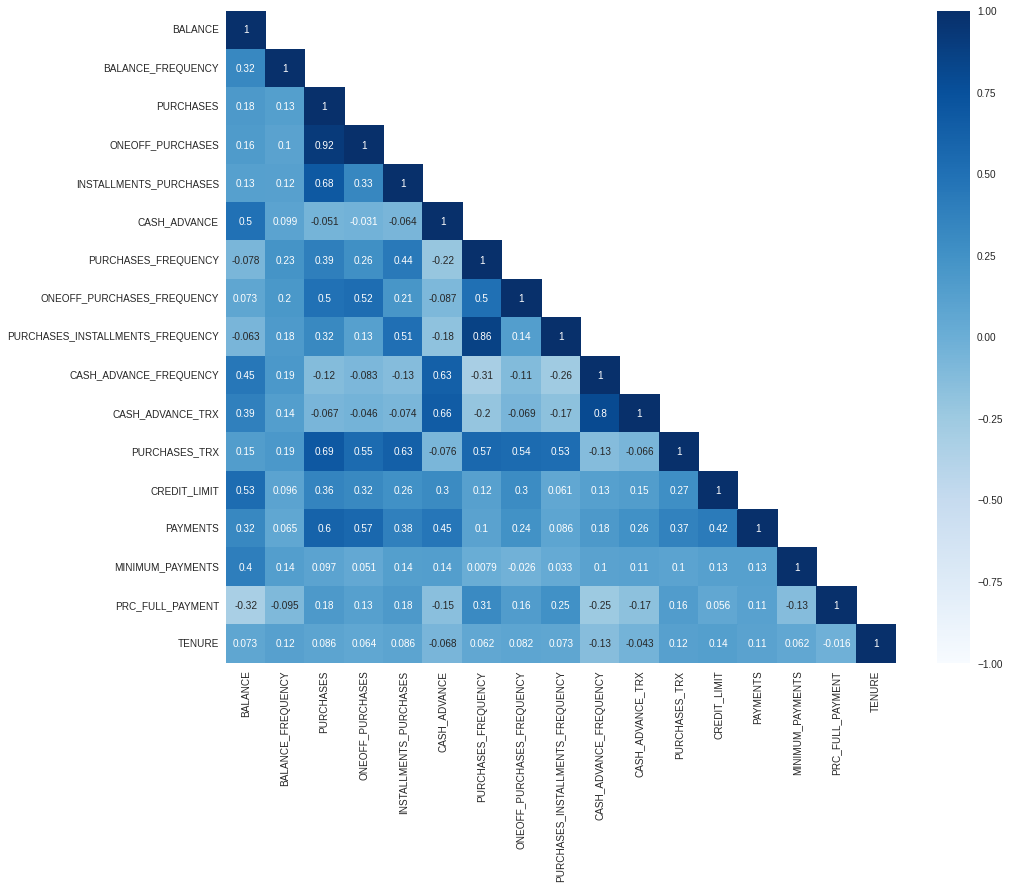

In [12]:
# Creating Heat map

df_corr=df.corr()
plt.figure(figsize=(15,12))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

###.3 Tratamento de outliers

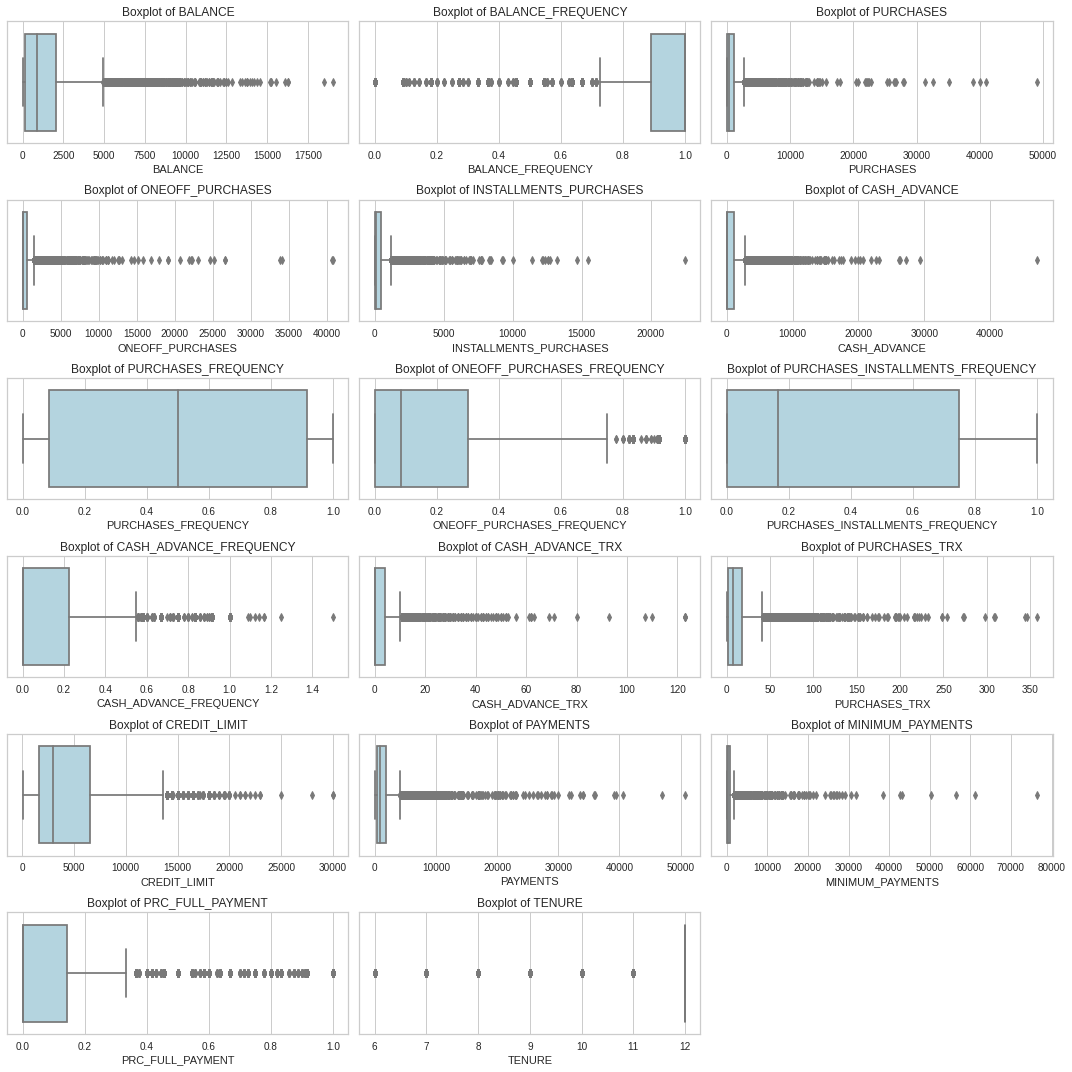

In [11]:
plt.figure(figsize=(15,15))

for i in range(len(df.columns)):
    plt.subplot(6,3,i+1)
    sns.boxplot(x = df[df.columns[i]],data=df,color='lightblue')
    plt.title('Boxplot of {}'.format(df.columns[i]))
    plt.tight_layout()

Escolhendo algumas feautes para fazer a limpeza dos dados. Vamos excluir todos outliers acima de 95%

In [13]:
df_col1 = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']

In [14]:
df1 = df.copy()

In [15]:
def exclui_outliers(DataFrame, col_name):
  filtro= DataFrame[col_name].quantile(.95)
  DataFrame.loc[df[col_name] >= filtro, col_name] = np.nan

In [16]:
for col in df_col1:
  exclui_outliers(df1, col)

In [17]:
df1.dropna(axis=0, inplace= True)

In [18]:
df1.shape

(6880, 17)

In [19]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,995.151694,0.857780,579.426174,300.337948,279.366419,500.025960,0.469246,0.162995,0.346478,0.100031,1.823547,9.750872,3456.202556,974.664002,410.897522,0.153512,11.468750
std,1190.965770,0.252570,721.139243,517.630795,452.429074,902.031092,0.391970,0.261136,0.386524,0.152807,2.995315,11.296587,2465.720075,974.757099,443.575376,0.290509,1.404998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,75.973734,0.818182,41.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.166113,145.768171,0.000000,12.000000
50%,547.868765,1.000000,308.190000,0.000000,76.430000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2700.000000,651.613201,218.279833,0.000000,12.000000
75%,1462.396758,1.000000,832.010000,395.012500,387.702500,650.349033,0.916667,0.250000,0.750000,0.166667,3.000000,13.000000,5000.000000,1298.660032,531.724151,0.166667,12.000000
max,5906.184924,1.000000,3986.240000,2655.990000,3927.120000,4639.195255,1.000000,1.000000,1.000000,1.166667,14.000000,56.000000,11500.000000,6043.227704,2707.521979,1.000000,12.000000


#5. Modelagem

##5.1 Standarização dos dados

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

##5.2 Método do Cotelo e Silhueta

Aqui vamos utilizar dois métodos para a escolha da quantidade de clusters que irá ser colocad no modelo.

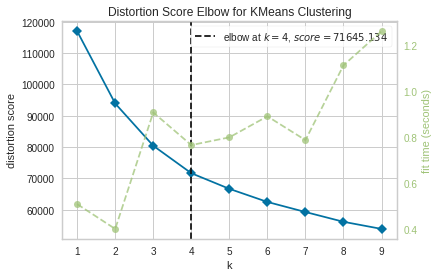

In [21]:
 ##implementando o método de Elbow com o yellowbrics
kmeans = KMeans()
kmeans.fit(df_scaled)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df_scaled)
visualizer.show()  

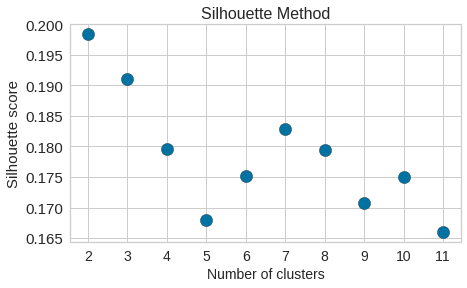

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

alvo = df_scaled
max = 12
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
gm_bic= []
gm_score=[]
for i in range(2,max):
    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))
    
    silhouette = silhouette_score(alvo,preds)
    km_silhouette.append(silhouette)

# Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


O método de elbow, sulhueta, apresentaram resultados parecidos, mostrando uma variação em torno de 4 a 5 clusters. Então, irei seguir com 4 clusters para a modelagem.

##5.3 Utilizando o KMeans

In [23]:
model = KMeans(4) #aqui treinamos o modelo
labels_kmeans = model.fit_predict(df_scaled) #lembre-se de treinar com os dados normalizados
df_kmeans=df1
df_kmeans['labels_kmeans']=labels_kmeans.astype('str') # aqui atribuimos o numero de cada clusters

In [41]:
df_kmeans['labels_kmeans'].value_counts()

3    2590
1    1774
0    1416
2    1100
Name: labels_kmeans, dtype: int64

##5.4 Visualização dos Clusters

Text(0, 0.5, 'PURCHASES')

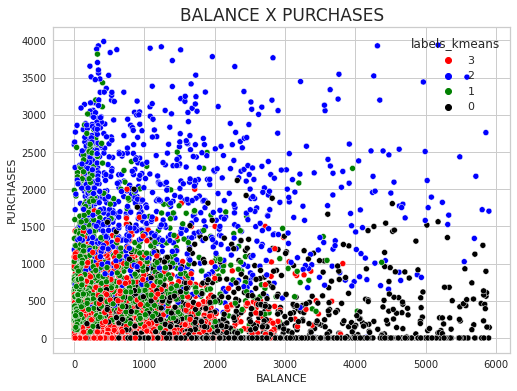

In [26]:
# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="BALANCE", y="PURCHASES",
                hue="labels_kmeans", data=df_kmeans, palette=['red','blue','green','black'])
plt.title('BALANCE X PURCHASES', fontsize = 17)

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

Vimos que o modelo conseguiu fazer uma separação visual nos dados. Mas, vamos usar outro método para tentar vê essa separação mais clara.

##5.5 Utlizando o PCA

Para uma melhor vizualização dos dados, vamos fazer uma redução de dimensionalidade nos dados para verificação da clusterização.

In [24]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7'])


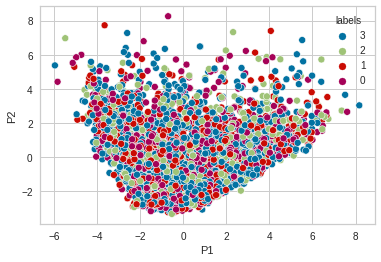

In [25]:
principalDf['labels']=df_kmeans['labels_kmeans']
sns.scatterplot(data=principalDf,x='P1',y='P2',hue='labels')

Mesmo, utlizando o PCA não consegumos ter uma visualização clara dos clusters em 2D.

#6. Análise dos Clusters

##6.1 Box-Plot

Para uma análise melhor do comportamento de cada clusters, vamos utilizar o box-plotpara a visualização do comportamento de cada um.

In [27]:
df_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

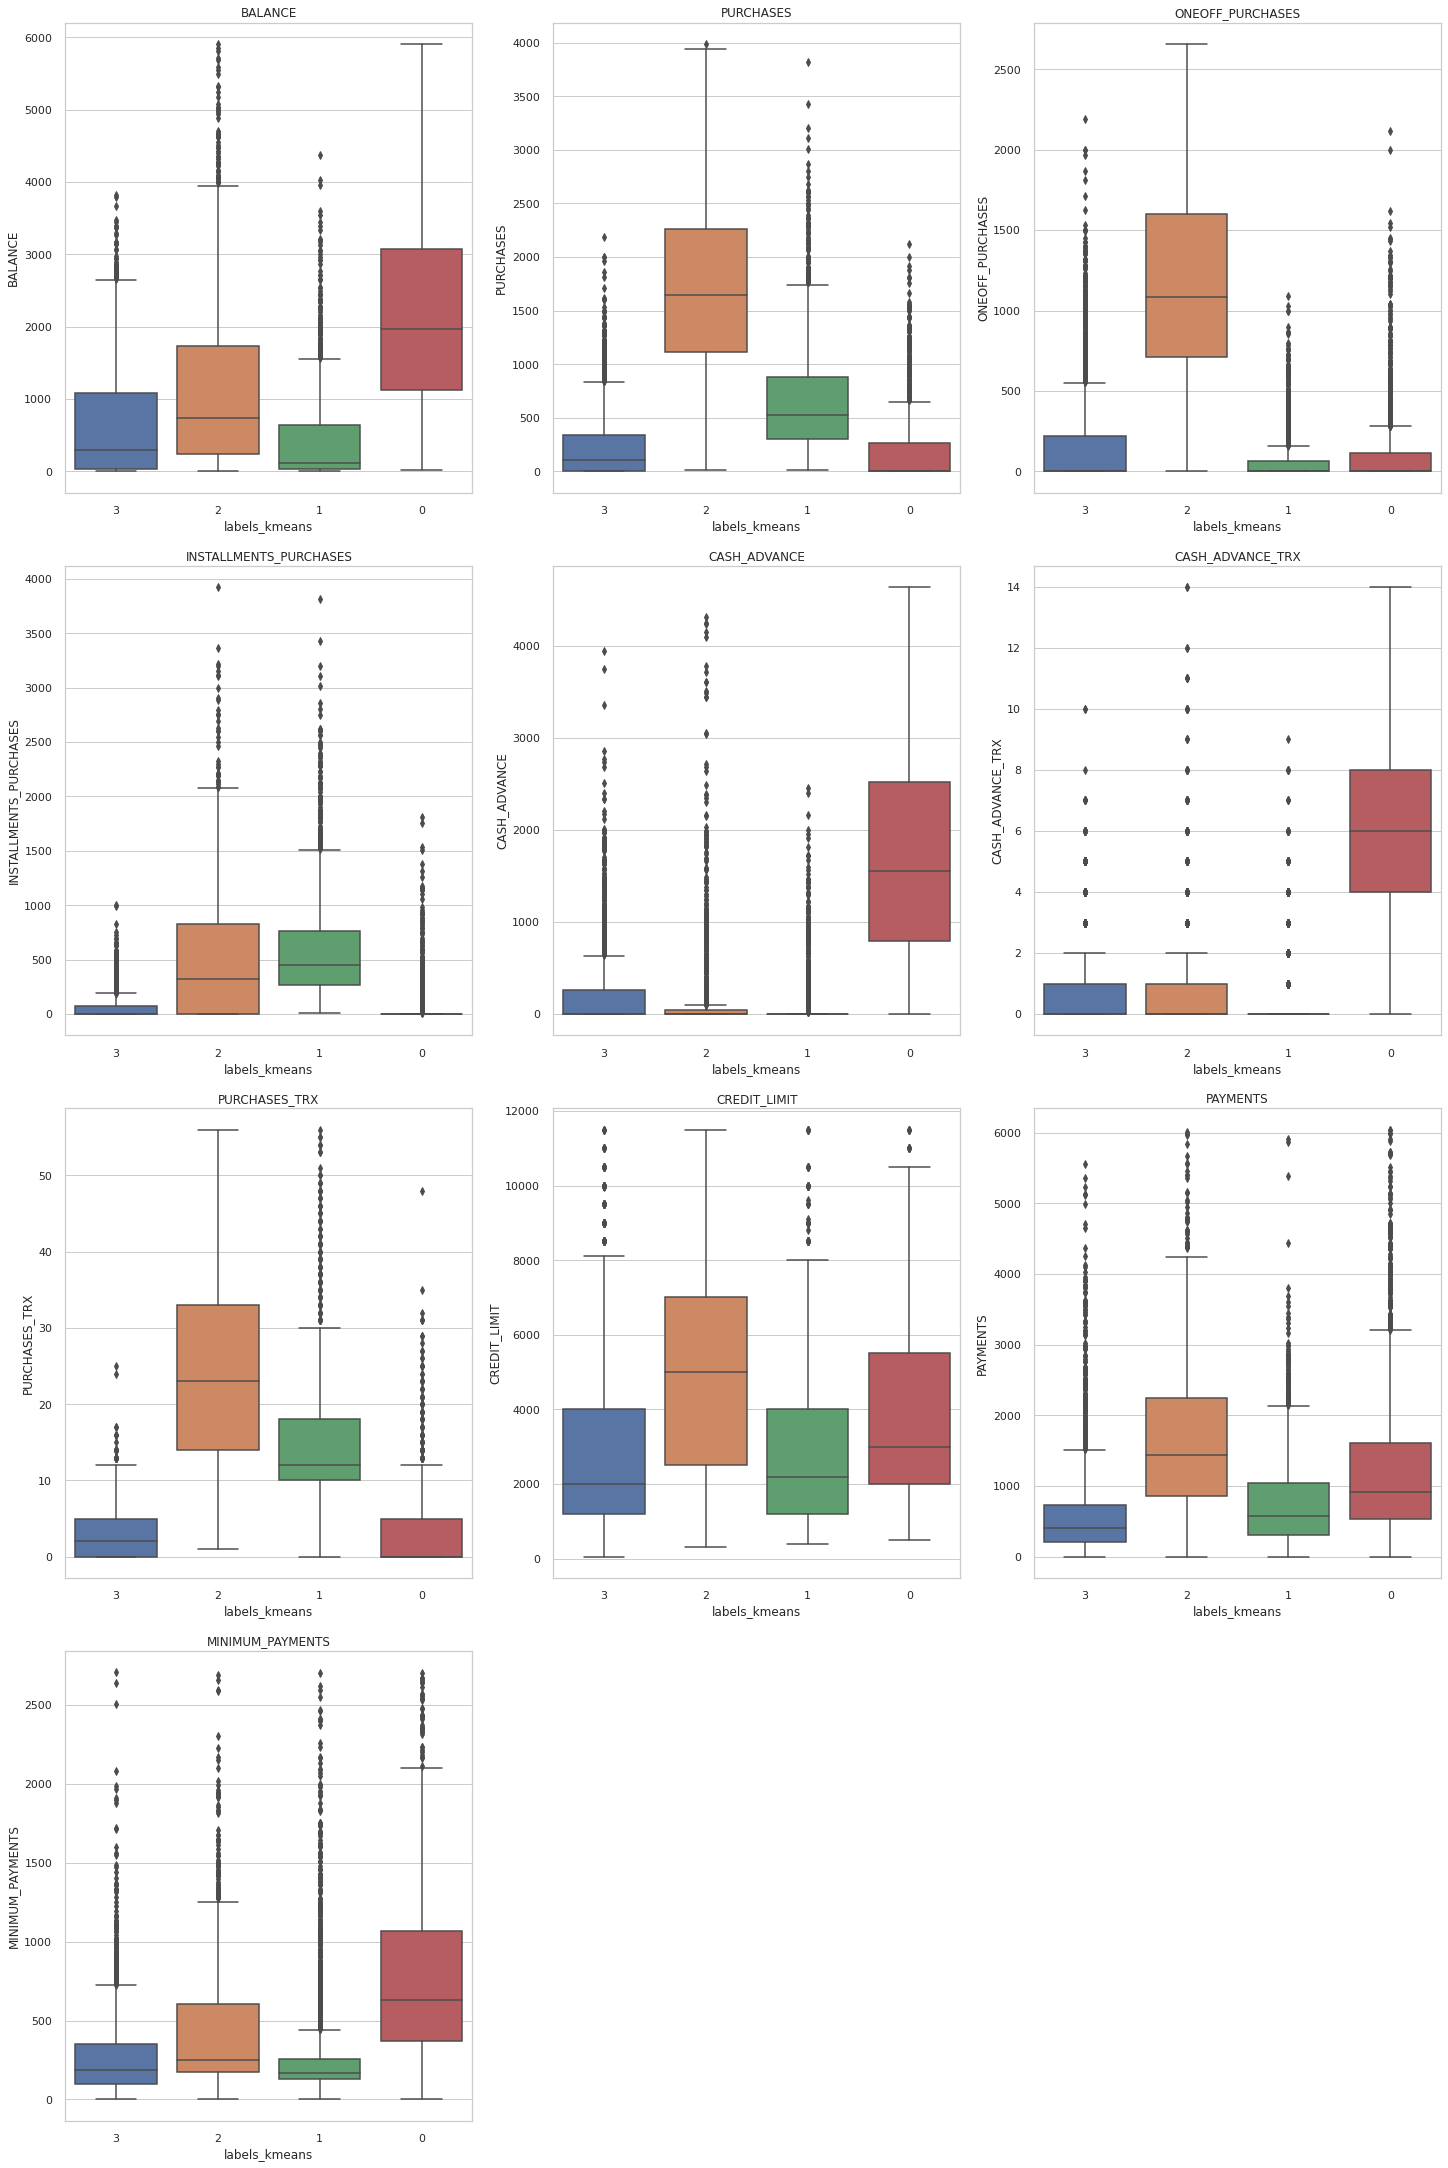

In [37]:
n = len(df_col)
fig = plt.figure(constrained_layout=True, figsize=(20, 30))
gs = gridspec.GridSpec(int(n/3) + 1, 3, figure=fig)
for i in range(n):
  k = int(i / 3)
  j = i % 3
  col = df_col[i]
  ax = fig.add_subplot(gs[k, j])
  ax.set_title(col)
  sns.boxplot(x='labels_kmeans', y = df_kmeans[col], data=df_kmeans)

Após a visualização das distribuições de cada clusters, podemos observar 4 perfis de acorodo o boxplot. Também, é identificado uma quantidade significativa de outilers quando faz essa comparação entre clusters.


Temos o primeiro perfil (cluster 0) ele compra muito em quantidade, mas não realiza pagamentos adiantados.

O segundo perfil (cluster 1) é o cliente em ascensão pois ele começando a comprar mais porém ainda compra em quantidade normal mas não paga adiantado.

O terceiro perfil (cluster 2) é o cliente que paga sempre adiantado as suas compras.

O quarto perfil (cluster 3) é um cliente que não compra muito e não paga adiantado.

#7. Modelo de Regressão

##7. 1 Separação variavel resposta

Vamos utilizar como nossa variavel target o `CREDIT_LIMIT`, para a previsão do limite de credito de cada cliente.

In [29]:
X = df_kmeans.drop(columns=['CREDIT_LIMIT'])
y = df_kmeans[['CREDIT_LIMIT']]

##7.2 Standerização dos Dados

In [77]:
scaler = StandardScaler()
X_esc = scaler.fit_transform(X)

##7.3 Trains Test Split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.2 ,random_state=42)

##7.4 MLPRegressor

para treinamento do modelo, resolvir aplicar uma tranfromação na variavel `y_train` com o logaritmo natural, com intuito da distribuição ficar mais perto da normal.

In [102]:
regr = MLPRegressor(random_state=42, max_iter=500)

regr.fit(X_train, np.log(y_train))

MLPRegressor(max_iter=500, random_state=42)

In [103]:
y_pred_treino = np.exp(regr.predict(X_train))
y_pred = np.exp(regr.predict(X_test))

##7.4.1 Métricas de Avaliação do modelo.

Vamos utilizar o mean absolure erro, r² e root mean square error. Como estamos analizando o limite de credito do cliente, a nossa métrica principal irán ser o RMSE que irá nos dizer o quanto o modelo está errando.

In [104]:
print(f'MAE_treino : {mean_absolute_error(y_train, y_pred_treino)}')
print(f'R²_treino : {r2_score(y_train, y_pred_treino)}')
print(f'RMSE_treino : {mean_squared_error(y_train, y_pred_treino, squared= False)}')

print()
print(f'MAE_teste : {mean_absolute_error(y_test, y_pred)}')
print(f'R²_teste : {r2_score(y_test, y_pred)}')
print(f'RMSE_teste : {mean_squared_error(y_test, y_pred, squared = False)}')

MAE_treino : 1273.1809577952395
R²_treino : 0.42083197092872515
RMSE_treino : 1889.7533820968356

MAE_teste : 1445.375524488335
R²_teste : 0.18600605894635291
RMSE_teste : 2159.5397242151707


# Otimizando os hiperparametros

Irá se utlizar o gridsearch para a buscar da melhor combinação de parametros para a otimização do modelo.

In [94]:
parameters = {'activation': ['relu'],
 'alpha': [0.0001],
 'hidden_layer_sizes': (90,100),
 'learning_rate_init': [0.002]}

In [106]:
regr1 = MLPRegressor(random_state=42, max_iter=500)


grd = GridSearchCV(regr1, parameters)
grd.fit(X_train, np.log(y_train))

GridSearchCV(estimator=MLPRegressor(max_iter=500, random_state=42),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': (90, 100),
                         'learning_rate_init': [0.002]})

In [96]:
best_esti = grd.best_estimator_

In [97]:
best_esti

MLPRegressor(hidden_layer_sizes=90, learning_rate_init=0.002, max_iter=500,
             random_state=42)

In [108]:
y_train_pred = np.exp(best_esti.predict(X_train))
y_pred = np.exp(best_esti.predict(X_test))


print(f'MAE_treino : {mean_absolute_error(y_train, y_train_pred)}')
print(f'R²_treino : {r2_score(y_train, y_train_pred)}')
print(f'RMSE_treino : {mean_squared_error(y_train, y_train_pred, squared= False)}')

print()
print(f'MAE_teste : {mean_absolute_error(y_test, y_pred)}')
print(f'R²_teste : {r2_score(y_test, y_pred)}')
print(f'RMSE_teste : {mean_squared_error(y_test, y_pred, squared = False)}')


MAE_treino : 1348.1548960616985
R²_treino : 0.3827578180648846
RMSE_treino : 1950.8803757310966

MAE_teste : 1455.2190948649654
R²_teste : 0.2293370612134782
RMSE_teste : 2101.2747807761293


O modelo apresentou uma melhora no RMSE indo de 2159 para 2101 com a otimização dos parametros. Mesmo assim, é nitido que ainda dá para tentar otimizar melhor, fazendo com um leque maior possiveis parametros.